# Tesla Stock Price Prediction Using Facebook Prophet

## Overview
This notebook demonstrates how to forecast Tesla's stock price for the next 30 days using Facebook Prophet, visualize the data with Plotly Express, and export the results for further analysis.

## Libraries Required
Make sure you have the following libraries installed:
- `pandas`
- `yfinance`
- `prophet`
- `plotly`

---



# Block 1: Import Necessary Libraries

In [15]:
from prophet import Prophet
import pandas as pd
import plotly.express as px
from datetime import datetime, timedelta
import yfinance as yf

# Block 2: Initialize Plotly Renderer

`plotly.io.renderers` (often shortened to `pio.renderers`) is used to control how and where Plotly figures are displayed, especially useful in environments with different display capabilities (e.g., Jupyter notebooks, web apps, or exported images). It defines the output format and location for rendering Plotly figures, enabling you to configure rendering settings to best suit your environment or project.

In [16]:
# Set the default renderer for Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

# Block 3: Define Date Range for Historical Data

We will be using 5 years of observations for this experiment

In [17]:
# Set the end date as today and start date as 5 years before
end = datetime.today()
start = end - timedelta(days=5*365)

print('Start Date:', start)
print('End Date:', end)

Start Date: 2019-10-29 03:23:56.269464
End Date: 2024-10-27 03:23:56.269464


# Block 4: Download Tesla Stock Data

In [18]:
# Download Tesla stock data from Yahoo Finance
TSLA = yf.download('TSLA', start=start, end=end)

# Display the first few rows to check data
TSLA.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2019-10-29 00:00:00+00:00,21.081333,21.081333,21.620001,20.983334,21.332666,190264500
2019-10-30 00:00:00+00:00,21.000668,21.000668,21.252666,20.664667,20.866667,144627000
2019-10-31 00:00:00+00:00,20.994667,20.994667,21.266666,20.866667,20.873333,76005000
2019-11-01 00:00:00+00:00,20.887333,20.887333,21.098667,20.653334,21.087999,95758500
2019-11-04 00:00:00+00:00,21.164667,21.164667,21.462667,20.617332,20.986668,131805000


In [19]:
# Creating a DataFrame from the downloaded stock data
df = pd.DataFrame(TSLA)

# Dropping MultiIndex from columns and resetting index
df.columns = df.columns.droplevel(1)
df = df.reset_index()

# Renaming columns for clarity
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = df['Date'].dt.tz_localize(None)

### Displaying basic information about the DataFrame

In [20]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-10-29,21.081333,21.081333,21.620001,20.983334,21.332666,190264500
1,2019-10-30,21.000668,21.000668,21.252666,20.664667,20.866667,144627000
2,2019-10-31,20.994667,20.994667,21.266666,20.866667,20.873333,76005000
3,2019-11-01,20.887333,20.887333,21.098667,20.653334,21.087999,95758500
4,2019-11-04,21.164667,21.164667,21.462667,20.617332,20.986668,131805000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   Adj Close  1257 non-null   float64       
 2   Close      1257 non-null   float64       
 3   High       1257 non-null   float64       
 4   Low        1257 non-null   float64       
 5   Open       1257 non-null   float64       
 6   Volume     1257 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [22]:
df.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,1257,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,2022-04-28 00:35:30.787589376,201.599050,201.599050,206.138064,196.848194,201.638601,1.268860e+08
min,2019-10-29 00:00:00,20.887333,20.887333,21.098667,20.617332,20.866667,2.940180e+07
25%,2021-01-28 00:00:00,162.990005,162.990005,167.500000,159.910004,163.970001,7.643520e+07
50%,2022-04-27 00:00:00,215.550003,215.550003,220.479996,210.139999,215.666672,1.033911e+08
75%,2023-07-28 00:00:00,253.860001,253.860001,258.470001,248.186661,253.509995,1.470522e+08
max,2024-10-25 00:00:00,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08
std,NaN,84.771092,84.771092,86.667227,82.909346,84.929365,8.227127e+07


# Block 6: Data Visualization using plotly Express: Visualizaing the historical performance of Tesla Stock

In [23]:
# Visualizing Tesla stock performance
# Area chart
fig1 = px.area(df, x='Date', y='Close', title='Tesla Stock Price Area Chart')
fig1.show()

# Line chart
fig2 = px.line(df, x='Date', y='Close', title='Tesla Stock Price Line Chart')
fig2.show()

# Bar chart
fig3 = px.bar(df, x='Date', y='Close', title='Tesla Stock Price Bar Chart')
fig3.show()

# Box plot for stock closing prices
fig4 = px.box(df, y='Close', title='Box Plot of Tesla Closing Prices')
fig4.show()

# Block 7: Preparing Data for Prophet

In [24]:
# Selecting relevant columns for Prophet
ndf = df[['Date', 'Close']].copy()

# Renaming columns for Prophet
ndf.columns = ['ds', 'y']

# Block 8: Creating and Fitting the Prophet Model

In [25]:
# Initializing and fitting the Prophet model
m = Prophet()
m.fit(ndf)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpchprp2d6/p5br20yu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpchprp2d6/1v34z7dy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5921', 'data', 'file=/tmp/tmpchprp2d6/p5br20yu.json', 'init=/tmp/tmpchprp2d6/1v34z7dy.json', 'output', 'file=/tmp/tmpchprp2d6/prophet_modelza7orm1m/prophet_model-20241027032357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:23:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:23:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Block 9: Making Predictions

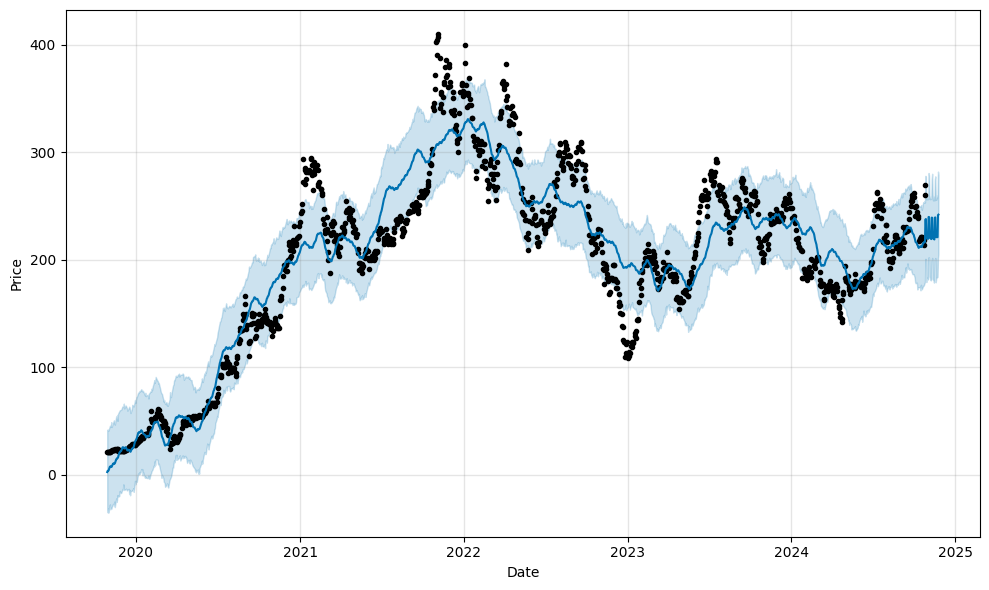

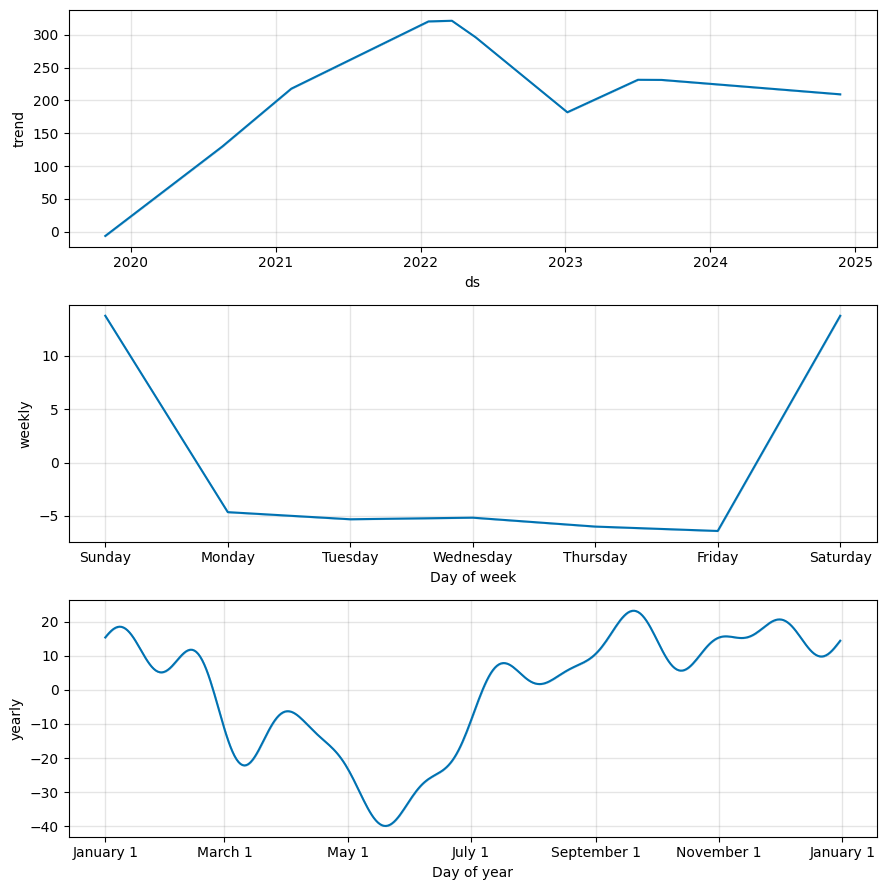

In [26]:
# Creating a DataFrame for future dates
forecast = m.make_future_dataframe(periods=30)

# Making predictions
forecast = m.predict(forecast)

# Visualizing the forecast
fig5 = px.line(forecast, x='ds', y='yhat', title='Forecasted Tesla Stock Prices')
fig5.show()

# Plotting the forecast and its components
figure1 = m.plot(forecast, xlabel='Date', ylabel='Price')
figure2 = m.plot_components(forecast)

# Block 10: Exporting Forecast Data For Further Exploration

In [27]:
# Importing the Colab Files Module
from google.colab import files

# Saving the forecast DataFrame as a CSV file
forecast.to_csv('forecast.csv')

# Downloading the CSV file to local storage
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion

In this project, we successfully demonstrated the application of Facebook Prophet for forecasting Tesla's stock prices over a 30-day horizon. Through careful data preparation, visualization, and model fitting, we were able to gain insights into Tesla's historical performance and project its future trends.

### Reflecting on the Insights Gained
This analysis serves not only as a technical exercise but also as an exploration of the intricate dynamics governing the stock market. Tesla, as a leader in electric vehicles and renewable energy, embodies the rapid changes in market sentiment, technological advancements, and consumer behavior. By leveraging tools like Facebook Prophet, investors and analysts can make data-driven decisions, which are crucial in a volatile market environment.

### Beyond the Numbers: The Bigger Picture
While predictive models can offer valuable forecasts, they are not infallible. The stock market is influenced by a myriad of factors—economic indicators, regulatory changes, global events, and market psychology. This complexity highlights the importance of continuous learning and adaptation in financial analysis. As new data becomes available, models should be recalibrated to reflect changing conditions.

### Encouraging Further Exploration
For those interested in delving deeper into stock forecasting, consider expanding the scope of your analysis. Here are a few suggestions:

1.  Incorporate Additional Data Sources: Explore how macroeconomic indicators, industry trends, or social media sentiment can affect stock prices.

2.  Experiment with Different Models: Beyond Prophet, investigate other forecasting models like ARIMA, LSTM (Long Short-Term Memory networks), or even ensemble methods that combine multiple forecasting techniques.

3.  Risk Assessment: Introduce techniques for assessing the risk associated with your forecasts, such as calculating Value at Risk (VaR) or employing Monte Carlo simulations.

4.  Real-Time Forecasting: Implement a system that updates forecasts in real time as new data comes in, allowing for adaptive decision-making.

5.  Cross-Stock Analysis: Expand the project to compare the stock performance of Tesla with other competitors in the electric vehicle market, providing a more comprehensive view of market dynamics.

### Closing Thoughts
As we advance further into an era dominated by data and technology, the ability to interpret and analyze financial information becomes increasingly valuable. This project not only equips you with technical skills in stock forecasting but also fosters a deeper understanding of the interconnectedness of economic factors. By combining analytical techniques with strategic thinking, you can position yourself to navigate the complexities of the financial world more effectively.